The Notebook Visualize the data from Bank Marketing and predict if the customer will respond positively to the campaign or not, For the target variable is “response”.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("bank-marketing.csv")

In [3]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [5]:
data.drop(['targeted'],axis=1,inplace=True)

In [6]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [7]:
data.response.value_counts()

no     39922
yes     5289
Name: response, dtype: int64

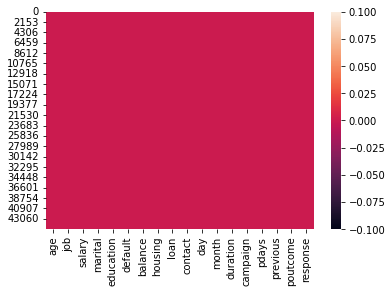

In [8]:
sns.heatmap(data.isnull())

NO null values

1 -Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


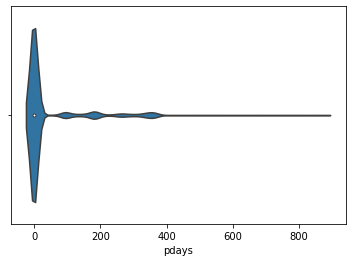

In [10]:
sns.violinplot(data['pdays'])

In [11]:
print('median',data.pdays.median())
print('mean:',data.pdays.mean())
print('mode:',data.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


2 - Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [12]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [13]:
dataWOP = data[data.pdays != -1]

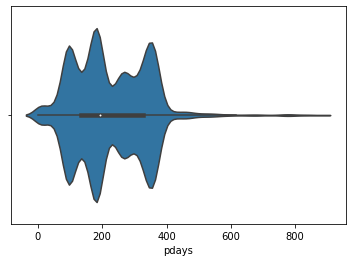

In [14]:
sns.violinplot(dataWOP.pdays)

In [15]:
print('median',dataWOP.pdays.median())
print('mean:',dataWOP.pdays.mean())
print('mode:',dataWOP.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


As there are no values for customers who were not approached ( -1). The mean median and mode have changed significantly

3 - Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [16]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [17]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [18]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

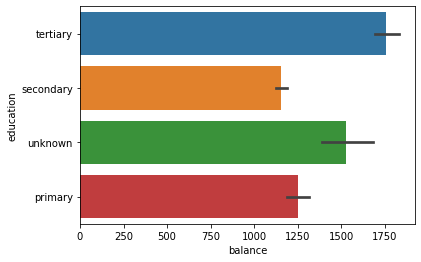

In [19]:
sns.barplot(data.balance,data.education)

4 - Make a box plot for pdays. Do you see any outliers?

outliers with -1


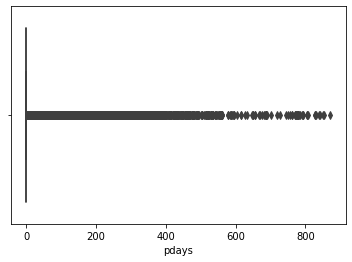

In [20]:
sns.boxplot(data.pdays)
print('outliers with -1')

outliers without -1


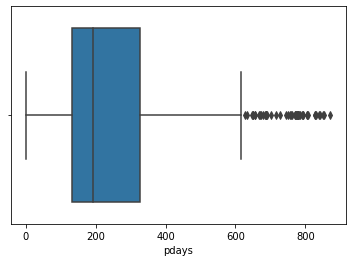

In [21]:
sns.boxplot(dataWOP.pdays)
print('outliers without -1')

Yes we can seee there are outliers in pdays

# EDA

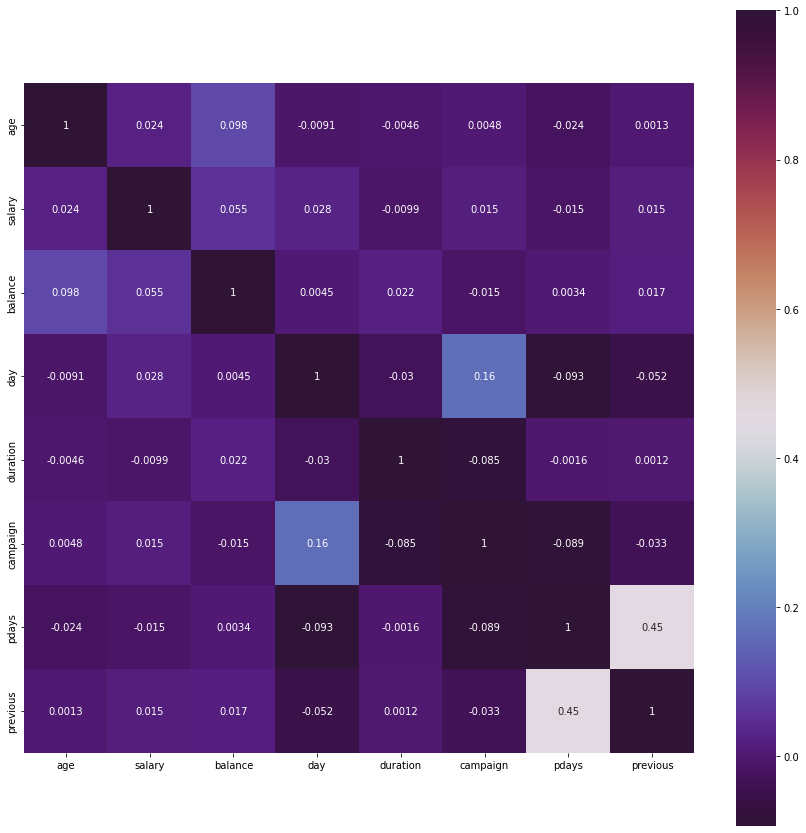

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  response   45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [24]:
data.replace({'response':{"yes":1,"no":0}},inplace=True)

In [25]:
### identigyind categorical and numerical columns
cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#Visualizing Categorical Features with response

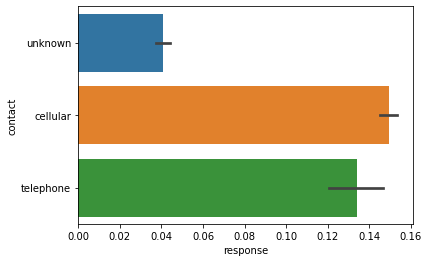

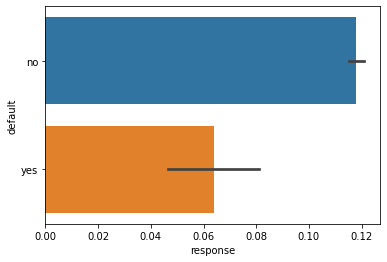

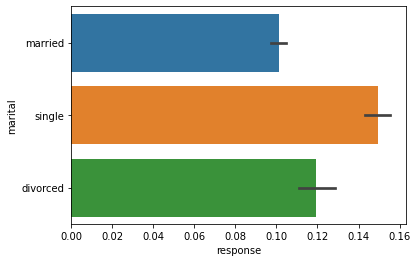

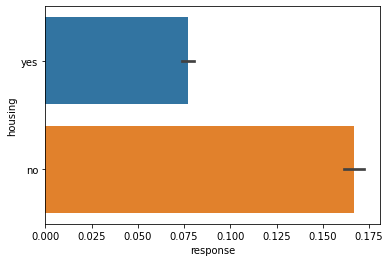

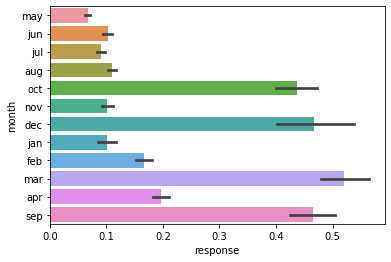

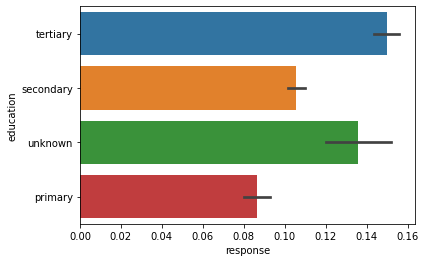

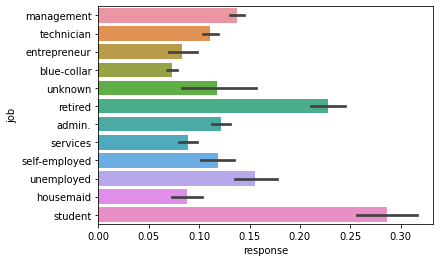

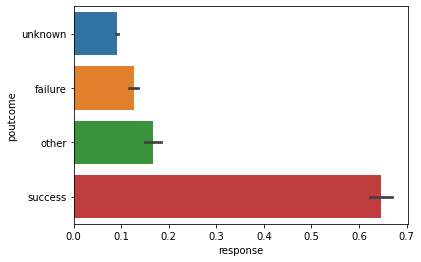

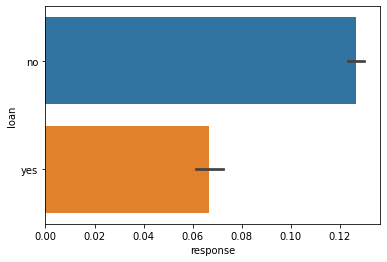

In [26]:
for i in data[cat_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

# Visualizing Numerical Features with response

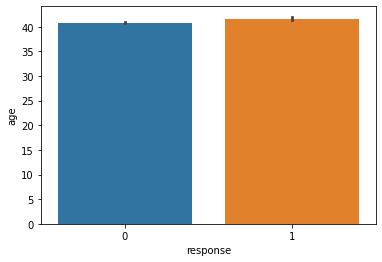

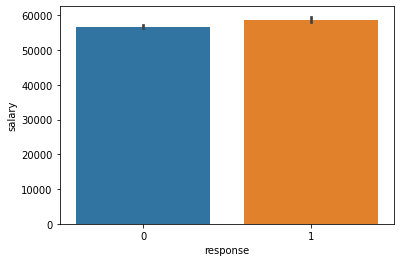

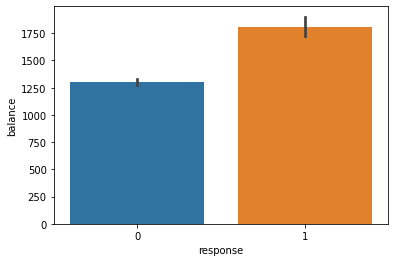

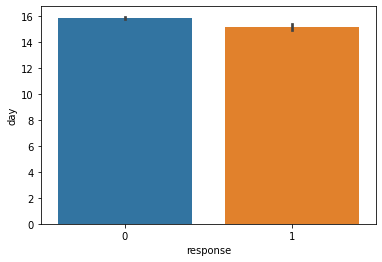

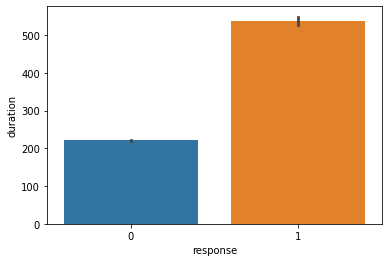

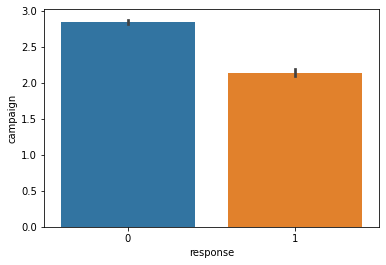

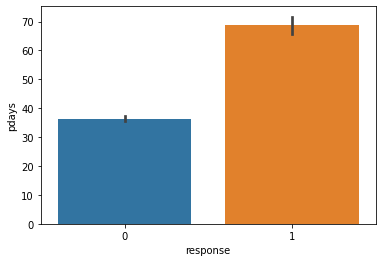

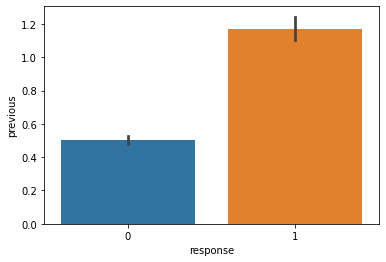

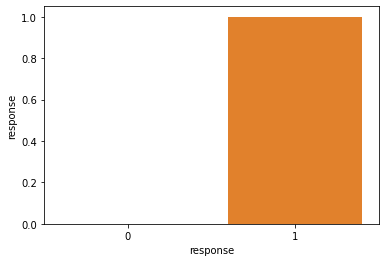

In [27]:
for i in data[num_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

In [28]:
data[cat_cols]

,contact,default,marital,housing,month,education,job,poutcome,loan
0,unknown,no,married,yes,may,tertiary,management,unknown,no
1,unknown,no,single,yes,may,secondary,technician,unknown,no
2,unknown,no,married,yes,may,secondary,entrepreneur,unknown,yes
3,unknown,no,married,yes,may,unknown,blue-collar,unknown,no
4,unknown,no,single,no,may,unknown,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,cellular,no,married,no,nov,tertiary,technician,unknown,no
45207,cellular,no,divorced,no,nov,primary,retired,unknown,no
45208,cellular,no,married,no,nov,secondary,retired,success,no
45209,telephone,no,married,no,nov,secondary,blue-collar,unknown,no


In [29]:
data[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
0,58,100000,2143,5,261,1,-1,0,0
1,44,60000,29,5,151,1,-1,0,0
2,33,120000,2,5,76,1,-1,0,0
3,47,20000,1506,5,92,1,-1,0,0
4,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1
45207,71,55000,1729,17,456,2,-1,0,1
45208,72,55000,5715,17,1127,5,184,3,1
45209,57,20000,668,17,508,4,-1,0,0


# PreProcessing

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
data1 = data[cat_cols].apply(LabelEncoder().fit_transform)

In [32]:
data1

,contact,default,marital,housing,month,education,job,poutcome,loan
0,2,0,1,1,8,2,4,3,0
1,2,0,2,1,8,1,9,3,0
2,2,0,1,1,8,1,2,3,1
3,2,0,1,1,8,3,1,3,0
4,2,0,2,0,8,3,11,3,0
...,...,...,...,...,...,...,...,...,...
45206,0,0,1,0,9,2,9,3,0
45207,0,0,0,0,9,0,5,3,0
45208,0,0,1,0,9,1,5,2,0
45209,1,0,1,0,9,1,1,3,0


In [33]:
data2 = data1.join(data[num_cols])

In [34]:
data2

,contact,default,marital,housing,month,education,job,poutcome,loan,age,salary,balance,day,duration,campaign,pdays,previous,response
0,2,0,1,1,8,2,4,3,0,58,100000,2143,5,261,1,-1,0,0
1,2,0,2,1,8,1,9,3,0,44,60000,29,5,151,1,-1,0,0
2,2,0,1,1,8,1,2,3,1,33,120000,2,5,76,1,-1,0,0
3,2,0,1,1,8,3,1,3,0,47,20000,1506,5,92,1,-1,0,0
4,2,0,2,0,8,3,11,3,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,1,0,9,2,9,3,0,51,60000,825,17,977,3,-1,0,1
45207,0,0,0,0,9,0,5,3,0,71,55000,1729,17,456,2,-1,0,1
45208,0,0,1,0,9,1,5,2,0,72,55000,5715,17,1127,5,184,3,1
45209,1,0,1,0,9,1,1,3,0,57,20000,668,17,508,4,-1,0,0


In [36]:
data2[data2.pdays == -1]

,contact,default,marital,housing,month,education,job,poutcome,loan,age,salary,balance,day,duration,campaign,pdays,previous,response
0,2,0,1,1,8,2,4,3,0,58,100000,2143,5,261,1,-1,0,0
1,2,0,2,1,8,1,9,3,0,44,60000,29,5,151,1,-1,0,0
2,2,0,1,1,8,1,2,3,1,33,120000,2,5,76,1,-1,0,0
3,2,0,1,1,8,3,1,3,0,47,20000,1506,5,92,1,-1,0,0
4,2,0,2,0,8,3,11,3,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,0,0,2,0,9,2,8,3,0,23,4000,113,17,266,1,-1,0,1
45205,0,0,2,0,9,1,9,3,1,25,60000,505,17,386,2,-1,0,1
45206,0,0,1,0,9,2,9,3,0,51,60000,825,17,977,3,-1,0,1
45207,0,0,0,0,9,0,5,3,0,71,55000,1729,17,456,2,-1,0,1


In [37]:
data2.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

# More than 70% of pdays have -1

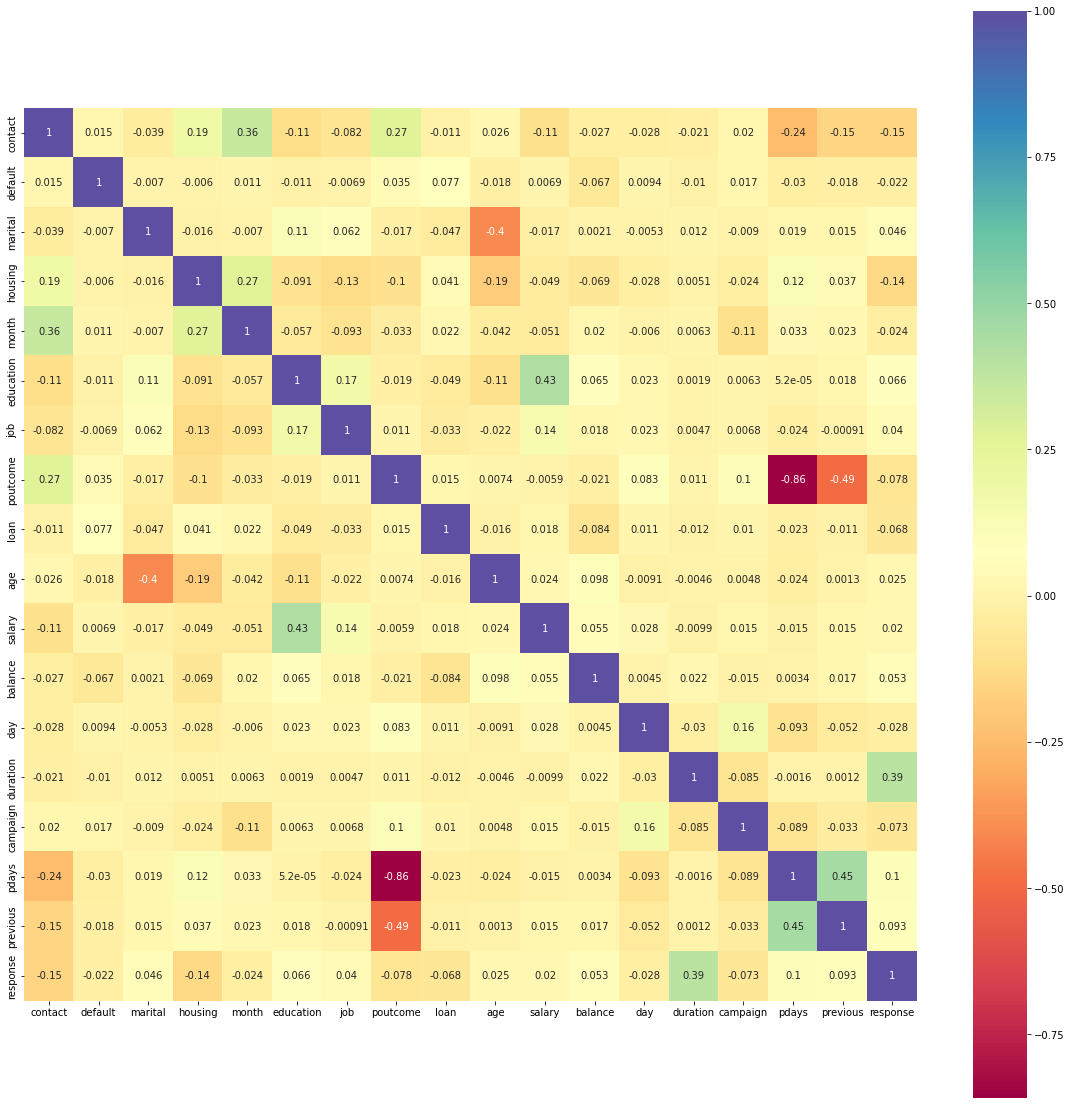

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(),square=True,annot=True,cmap= 'Spectral')

In [39]:
data2.corr()

,contact,default,marital,housing,month,education,job,poutcome,loan,age,salary,balance,day,duration,campaign,pdays,previous,response
contact,1.000000,0.015404,-0.039201,0.188123,0.361145,-0.110928,-0.082063,0.272214,-0.010873,0.026221,-0.108612,-0.027273,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,-0.148395
default,0.015404,1.000000,-0.007023,-0.006025,0.011486,-0.010718,-0.006853,0.034898,0.077234,-0.017879,0.006860,-0.066745,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
marital,-0.039201,-0.007023,1.000000,-0.016096,-0.006991,0.108576,0.062045,-0.016850,-0.046893,-0.403240,-0.016633,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.045588
housing,0.188123,-0.006025,-0.016096,1.000000,0.271481,-0.090790,-0.125363,-0.099971,0.041323,-0.185513,-0.048965,-0.068768,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
month,0.361145,0.011486,-0.006991,0.271481,1.000000,-0.057304,-0.092870,-0.033038,0.022145,-0.042357,-0.050723,0.019777,-0.006028,0.006314,-0.110031,0.033065,0.022727,-0.024471
education,-0.110928,-0.010718,0.108576,-0.090790,-0.057304,1.000000,0.166707,-0.019361,-0.048574,-0.106807,0.425256,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.066241
job,-0.082063,-0.006853,0.062045,-0.125363,-0.092870,0.166707,1.000000,0.011010,-0.033004,-0.021868,0.141655,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.040438
poutcome,0.272214,0.034898,-0.016850,-0.099971,-0.033038,-0.019361,0.011010,1.000000,0.015458,0.007367,-0.005864,-0.020967,0.083460,0.010925,0.101588,-0.858362,-0.489752,-0.077840
loan,-0.010873,0.077234,-0.046893,0.041323,0.022145,-0.048574,-0.033004,0.015458,1.000000,-0.015655,0.017749,-0.084350,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
age,0.026221,-0.017879,-0.403240,-0.185513,-0.042357,-0.106807,-0.021868,0.007367,-0.015655,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155


# ML Modelling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [43]:
for i in data2.columns:
    X = data2[[i]]
    y = data2['response']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print("F1 Score for", i , f1_score(y_pred,y_test))

F1 Score for contact 0.0
F1 Score for default 0.0
F1 Score for marital 0.0
F1 Score for housing 0.0
F1 Score for month 0.0
F1 Score for education 0.0
F1 Score for job 0.0
F1 Score for poutcome 0.0
F1 Score for loan 0.0
F1 Score for age 0.0
F1 Score for salary 0.0
F1 Score for balance 0.0024984384759525295
F1 Score for day 0.0
F1 Score for duration 0.2599601593625498
F1 Score for campaign 0.0
F1 Score for pdays 0.0
F1 Score for previous 0.004932182490752157
F1 Score for response 1.0


In [44]:
X = data2.drop('response',axis=1)
y = data2['response']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [46]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [47]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))


Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.59      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.74      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.24962999506660088
confusion Matrix:
 [[11790  1344]
 [  177   253]]
cross validation: [0.90224483 0.89028976 0.89017916 0.86551648 0.85799602]


In [48]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              1151.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                        0.00
Time:                        13:22:47   Log-Likelihood:                         -7512.7
No. Observations:               45211   AIC:                                  1.506e+04
Df Residuals:                   45194   BIC:                                  1.521e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Using RFE

In [50]:
from sklearn.feature_selection import RFE


In [52]:
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=101))

In [53]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['contact', 'default', 'marital', 'housing', 'education', 'loan',
       'campaign', 'previous'],
      dtype='object')


In [54]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print("F1 Score:",f1_score(y_pred2,y_test))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",accuracy_score(y_pred2,y_test))

In [56]:
logReggResult()

Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11967
           1       0.21      0.00      0.00      1597

    accuracy                           0.88     13564
   macro avg       0.55      0.50      0.47     13564
weighted avg       0.80      0.88      0.83     13564

F1 Score: 0.0037243947858473
AUC score: 0.5004796638888858
confusion Matrix:
 [[11956  1594]
 [   11     3]]
kfold cross validation:
 [0.90224483 0.89028976 0.89017916 0.86551648 0.85799602]
Acurracy :::> 0.8816720731347685


In [61]:
## Feature Importance
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['contact', 'month', 'poutcome', 'age', 'day', 'campaign'], dtype='object')

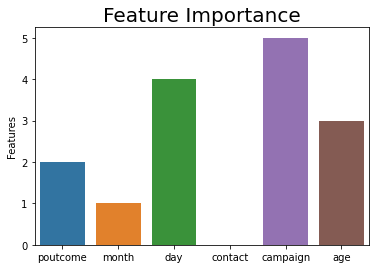

In [62]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
X = data2.drop('response',axis=1)
y = data2['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [67]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=50,
                       random_state=101)

In [68]:
y_pred1 = rfc.predict(X_test)

In [69]:
from sklearn.tree import export_graphviz
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'response',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [70]:
os.system('dot -Tpng tree1.dot -o tree1.png')

0

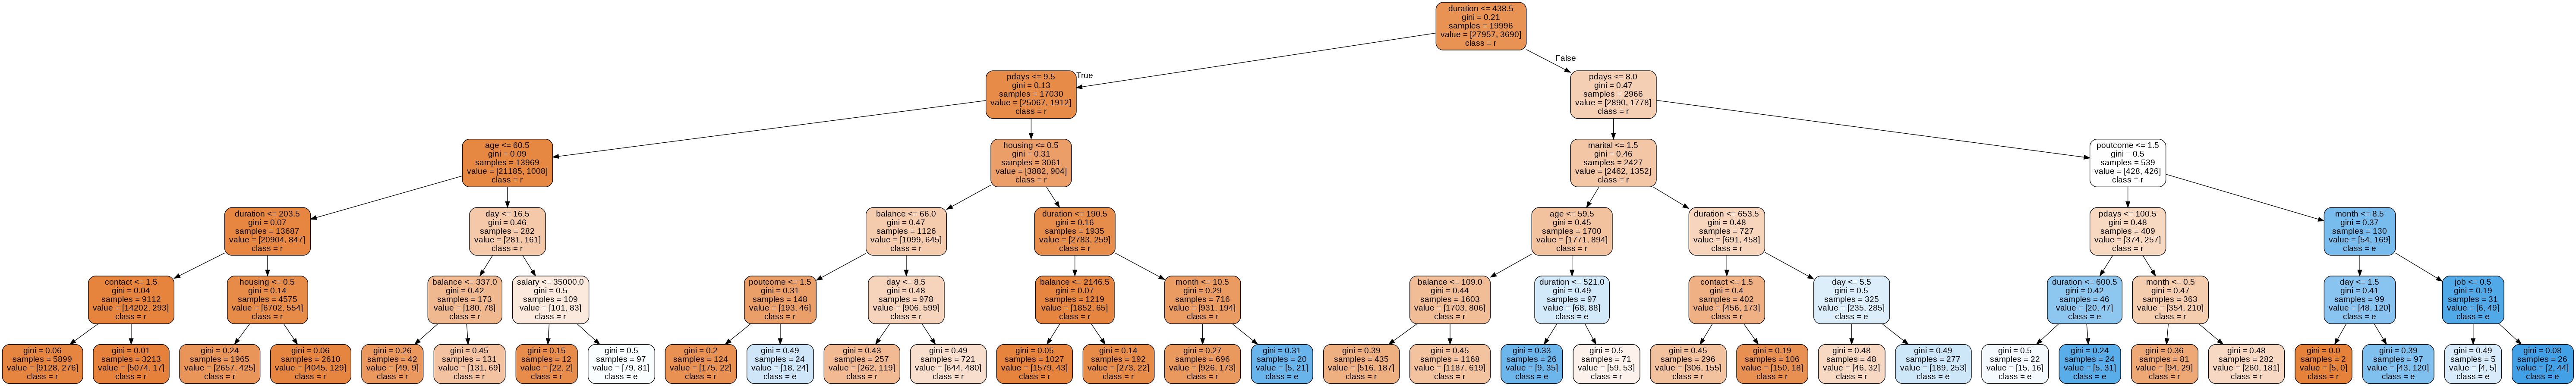

In [71]:
from IPython.display import Image
Image(filename = 'tree1.png')

In [72]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",accuracy_score(y_pred,y_test))

In [73]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.81      0.15      0.25      1597

    accuracy                           0.90     13564
   macro avg       0.85      0.57      0.60     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.25343189017951423
confusion Matrix:
 [[11910  1357]
 [   57   240]]
cross validation: [0.88300343 0.88354346 0.87248396 0.66799381 0.81209909]
AUC score: 0.5718156834865071
Acurracy :::> 0.887864936596874


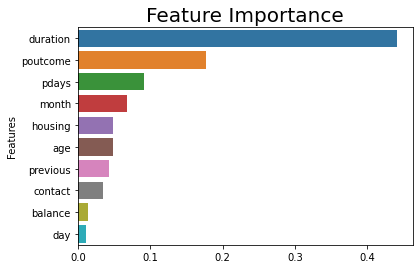

In [74]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

# Comparision

We choose the F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable is imbalanced. So, Precision and Recall can be the main factor for evaluation model and we get the harmonic mean for the same in form of F1 score.

In [75]:
print (start + "############### Random Forest Result: ###############\n")
RF()
print(start +'\n\n############# Logistic Regression Result: ############\n')
logReggResult()

############### Random Forest Result: ###############

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.81      0.15      0.25      1597

    accuracy                           0.90     13564
   macro avg       0.85      0.57      0.60     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.25343189017951423
confusion Matrix:
 [[11910  1357]
 [   57   240]]
cross validation: [0.88300343 0.88354346 0.87248396 0.66799381 0.81209909]
AUC score: 0.5718156834865071
Acurracy :::> 0.887864936596874


############# Logistic Regression Result: ############

Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11967
           1       0.21      0.00      0.00      1597

    accuracy                           0.88     13564
   macro avg       0.55      0.50      0.47     13564
weighted avg       0.80      0.88      0.83     13564

In [82]:
RandomForest_Accuracy = accuracy_score(y_pred,y_test)
LogisticRegression_Accuracy = accuracy_score(y_pred2,y_test)

<BarContainer object of 1 artists>

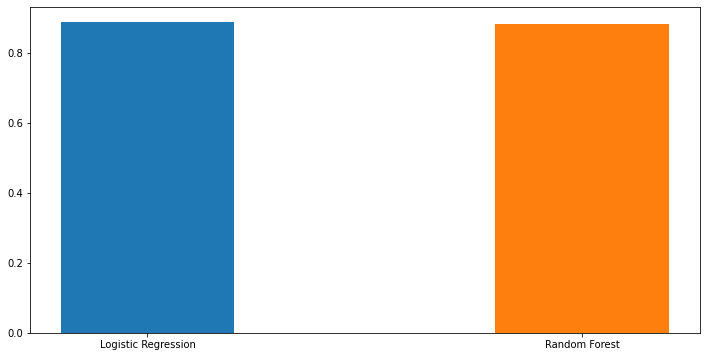

In [85]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",RandomForest_Accuracy,width=0.4)
plt.bar("Random Forest",LogisticRegression_Accuracy,width=0.4)

In [ ]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

We see that the Random Forest has Perfomed good in comparision to Logistic Regression

Random Forest has Better F1 score, AUC, Confusion Matrix, kfold Cross val and accuracy in compare to Logistic Regression.¶